In [1]:
# Install necessary libraries if needed
!pip install -U scikit-learn pandas matplotlib seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 69.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.0
    Uninstalling matplotlib-3.8.0:
      Successfully uninstalled matplotlib-3.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier  # For classification example
from sklearn.linear_model import LinearRegression    # For regression example
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load your dataset (you can upload a CSV file or use a dataset from a URL)
url = "food-price-index-september-2023-seasonally-adjusted.csv"  # Replace with your dataset URL
data = pd.read_csv(url)

# Display the first few rows of the dataset
data.head()


,Series_reference,Period,Data_value,STATUS,UNITS,Subject,Group,Series_title_1
0,CPIM.SE9S01,1999.06,645.0,REVISED,Index,Consumers Price Index - CPI,"Food Price Index for New Zealand, Seasonally a...",Seasonally adjusted
1,CPIM.SE9S01,1999.07,647.0,REVISED,Index,Consumers Price Index - CPI,"Food Price Index for New Zealand, Seasonally a...",Seasonally adjusted
2,CPIM.SE9S01,1999.08,645.0,REVISED,Index,Consumers Price Index - CPI,"Food Price Index for New Zealand, Seasonally a...",Seasonally adjusted
3,CPIM.SE9S01,1999.09,644.0,REVISED,Index,Consumers Price Index - CPI,"Food Price Index for New Zealand, Seasonally a...",Seasonally adjusted
4,CPIM.SE9S01,1999.10,641.0,REVISED,Index,Consumers Price Index - CPI,"Food Price Index for New Zealand, Seasonally a...",Seasonally adjusted


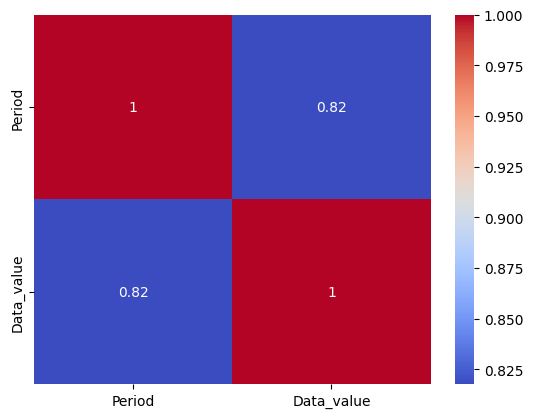

[ True]


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:779: UserWarning: k=5 is greater than n_features=1. All the features will be returned.
  warnings.warn(


In [9]:

numerical_data = data.select_dtypes(include=np.number)
corr = numerical_data.corr()


sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


from sklearn.feature_selection import SelectKBest, f_classif  # For classification
# or
from sklearn.feature_selection import SelectKBest, f_regression  # For regression

target_column = 'Data_value'  # Example: 'Data_value'

# Ensure X contains only numerical features and excludes the target column
X = numerical_data.drop(target_column, axis=1) if target_column in numerical_data else numerical_data
y = data[target_column]  # Target variable


y = y.fillna(y.mean())




selector = SelectKBest(score_func=f_classif, k=5)


X_new = selector.fit_transform(X, y)
print(selector.get_support())  # Display selected features

In [10]:

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)


In [12]:

from sklearn.ensemble import RandomForestRegressor



model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [15]:

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")



from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 5705.913197830539
R-squared: 0.6765207047106276


In [16]:

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 5705.91


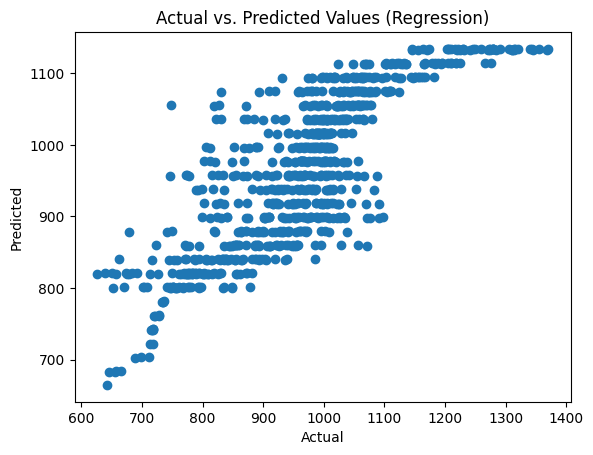

In [18]:

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Regression)')
plt.show()


In [19]:
import joblib
joblib.dump(model, 'model.pkl')  # Save model


['model.pkl']

In [20]:
model = joblib.load('model.pkl')  # Load saved model
